# Faims Analysis

This notebook covers the following things:
- processing
- xirt
- qc

In [105]:
import sys
sys.path.append("../") # go to parent dir
from xifaims import processing as xp
from xifaims import plots as xpl
import yaml
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import pandas as pd
import os

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy.stats import pearsonr

def find_nearest(value, array):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [166]:
option = "minimal"
option = "smaller"
#option = "small"
#option = "structure"
name = f"faims_{option}-4PM_DSS_LS_nonunique1pCSM"
outdir = fr'..\results\\faims_{option}-4PM_DSS_LS_nonunique1pCSM\\'
metrics_df = pd.read_csv(os.path.join(outdir,r'{}_all_metrics.csv'.format(name)), index_col=0).round(2)
predictions_df = pd.read_csv(os.path.join(outdir,r'{}_summary_CV.csv'.format(name)), index_col=0).round(2)
summary_df = pd.read_csv(os.path.join(outdir,r'{}_summary_predictions.csv'.format(name)), index_col=0).round(2)
print(name)
display(predictions_df.head())
display(summary_df.head())
display(metrics_df.head())
print(metrics_df["classifier"].value_counts())

faims_smaller-4PM_DSS_LS_nonunique1pCSM


,CV_Train,CV_Predict,Set,classifier,run,config,infile
0,-60.0,-60.0,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv
1,-45.0,-45.0,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv
2,-55.0,-55.0,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv
3,-40.0,-40.0,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv
4,-30.0,-30.0,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv


,clf,set,pearson,r2,mse,run
0,FNN,Test,0.60,0.36,77.45,faims_smaller-4PM_DSS_LS_nonunique1pCSM
1,FNN,Train,0.64,0.41,74.24,faims_smaller-4PM_DSS_LS_nonunique1pCSM
2,SVC,Test,0.38,0.15,127.31,faims_smaller-4PM_DSS_LS_nonunique1pCSM
3,SVC,Train,0.95,0.90,12.22,faims_smaller-4PM_DSS_LS_nonunique1pCSM
4,SVR,Test,0.53,0.28,96.08,faims_smaller-4PM_DSS_LS_nonunique1pCSM


,cv_split,mse,split,classifier,params,config,infile,run
0,split0_test_score,0.24,test,SVC,"{'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}",parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,faims_smaller-4PM_DSS_LS_nonunique1pCSM
1,split1_test_score,0.25,test,SVC,"{'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}",parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,faims_smaller-4PM_DSS_LS_nonunique1pCSM
2,split2_test_score,0.24,test,SVC,"{'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}",parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,faims_smaller-4PM_DSS_LS_nonunique1pCSM
3,split0_train_score,0.91,train,SVC,"{'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}",parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,faims_smaller-4PM_DSS_LS_nonunique1pCSM
4,split1_train_score,0.91,train,SVC,"{'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}",parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,faims_smaller-4PM_DSS_LS_nonunique1pCSM


SVC               6
SVR               6
XGBR              6
XGB_sequential    6
FNN               6
XGBC              6
Name: classifier, dtype: int64


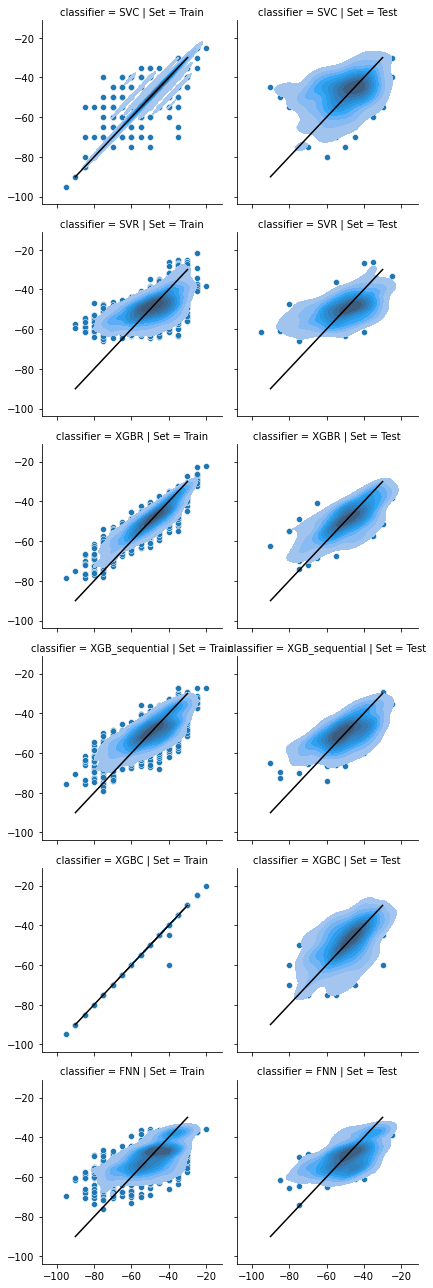

In [157]:
#xpl.train_test_scatter_plot(predictions_df, outdir, show=True)
x = "CV_Train"
y = "CV_Predict"
g = sns.FacetGrid(predictions_df, col="Set", row="classifier", sharex=True, sharey=True)
g = g.map(sns.scatterplot,x, y)
#g = g.map(sns.histplot,x, y, bins=50, pthresh=0.1, cmap="mako") #(x=x, y=y, bins=50, pthresh=.1, cmap="mako"))
g = g.map(sns.kdeplot,x, y, fill=True)#(x=x, y=y, levels=5, color="w", linewidths=1))
g = g.map(xpl.const_line)

#xpl.train_test_scatter_plot(predictions_df, outdir, show=True)

..\xifaims\plots.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_metrics["abs_mse"] = all_metrics["mse"].abs()


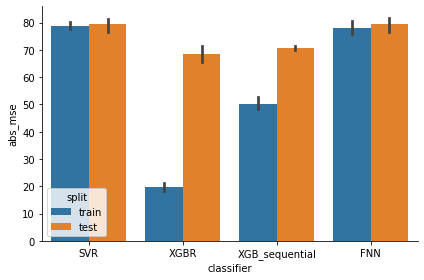

..\xifaims\plots.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_metrics["abs_mse"] = all_metrics["mse"].abs()


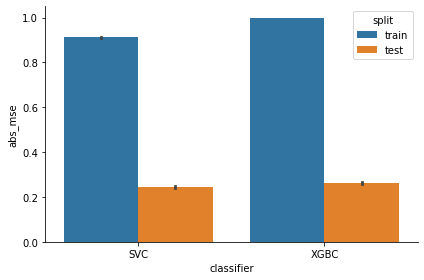

In [158]:
xpl.cv_performance_plot(metrics_df[~metrics_df["classifier"].str.contains("C")], outdir, show=True)
xpl.cv_performance_plot(metrics_df[metrics_df["classifier"].str.contains("C")], outdir, show=True)

In [165]:
unique_cv = np.array(sorted(predictions_df["CV_Train"].drop_duplicates()))
predictions_df["CV_Predict"]
predictions_df["CV_Predict_class"] = predictions_df["CV_Predict"].apply(find_nearest, args=(unique_cv,))
predictions_df.round(2)

,CV_Train,CV_Predict,Set,classifier,run,config,infile,CV_Predict_class
0,-60.0,-60.00,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-60.0
1,-45.0,-45.00,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-45.0
2,-55.0,-55.00,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-55.0
3,-40.0,-40.00,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-40.0
4,-30.0,-30.00,Train,SVC,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-30.0
...,...,...,...,...,...,...,...,...
3563,-50.0,-57.31,Test,FNN,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-55.0
3564,-50.0,-60.15,Test,FNN,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-60.0
3565,-40.0,-51.83,Test,FNN,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-50.0
3566,-35.0,-56.01,Test,FNN,faims_smaller-4PM_DSS_LS_nonunique1pCSM,parameters/faims_smaller.yaml,data/4PM_DSS_LS_nonunique1pCSM.csv,-55.0


,,classifier,set,accuracy,MSE,PearsonR
classifier,Set,,,,,
XGBR,Test,XGBR,Test,0.30,64.15,0.71
XGB_sequential,Test,XGB_sequential,Test,0.24,74.79,0.63
FNN,Test,FNN,Test,0.25,77.10,0.60
XGBC,Test,XGBC,Test,0.33,79.55,0.60
SVR,Test,SVR,Test,0.22,97.69,0.52
SVC,Test,SVC,Test,0.23,127.31,0.38


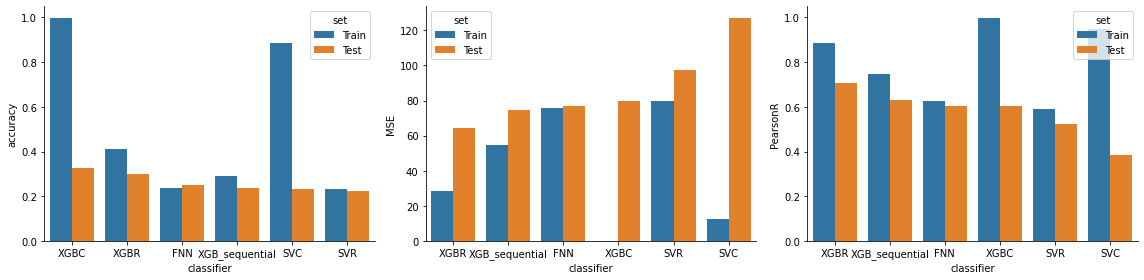

In [164]:
res1 = predictions_df.groupby(["classifier", "Set"], as_index=False).apply(lambda df: accuracy_score(df["CV_Train"], df["CV_Predict_class"]))
res2 = predictions_df.groupby(["classifier", "Set"], as_index=False).apply(lambda df: mean_squared_error(df["CV_Train"], df["CV_Predict_class"]))
res3 = predictions_df.groupby(["classifier", "Set"], as_index=False).apply(lambda df: pearsonr(df["CV_Train"], df["CV_Predict_class"])[0])
res1.columns = ["classifier", "set", "accuracy"]
res1["MSE"] = res2[None].values
res1["PearsonR"] = res3[None].values
order1 = res1[res1["set"] == "Test"].sort_values("accuracy", ascending=False)["classifier"]
order2 = res1[res1["set"] == "Test"].sort_values("MSE", ascending=True)["classifier"]
order3 = res1[res1["set"] == "Test"].sort_values("PearsonR", ascending=False)["classifier"]
res_p = res1[res1["set"] == "Test"].sort_values("MSE", ascending=True).round(2)
display(res_p)
f, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0] = sns.barplot(x="classifier", y="accuracy", hue="set", data=res1, hue_order=["Train", "Test"], order=order1, ax=ax[0])
ax[1] = sns.barplot(x="classifier", y="MSE", hue="set", data=res1, hue_order=["Train", "Test"], order=order2, ax=ax[1])
ax[2] = sns.barplot(x="classifier", y="PearsonR", hue="set", data=res1, hue_order=["Train", "Test"], order=order3, ax=ax[2])
plt.tight_layout()
for axes in ax:
    sns.despine(ax=axes)


## Interpretation

The above plot shows the train and test error (not the crossvalidation errors though).
- pearson -> higher better
- accuracy -> higher better
- mean-squared-error -> lower better

It seems like XGBoost Regressor the best performing model on average with the given feature set.